In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## 1. Reading and exploring the data

In [2]:
data_pd=pd.read_csv('./data/epi_r.csv')

In [3]:
#Deleting null predictive variables from the dataset
data_pd=data_pd.loc[(data_pd.rating>0) & (~data_pd.rating.isna())]
data_pd.shape

(18216, 680)

In [4]:
#Deleting drinks
data_pd=data_pd.loc[(data_pd.drink==0) & (data_pd.drinks==0) & (data_pd.cocktail==0)]
data_pd.shape
data_pd.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Get out X and y

In [5]:
X = pd.concat([data_pd.iloc[:,0], data_pd.iloc[:,2:]], axis=1)
y = data_pd.iloc[:,1]

### Feature engineering

n_words: Proxy feature for complexity (Sum across word features, from alabama to zuccini)

In [6]:
X["n_words"] = X.iloc[:,11:673].sum(axis=1)

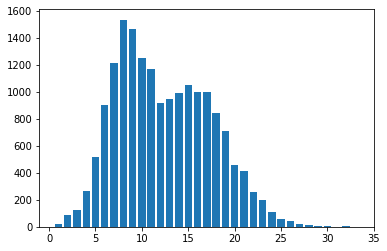

In [16]:
import matplotlib.pyplot as plt

# Histogram of value counts of n_words
plt.bar(X.n_words.value_counts().index, X.n_words.value_counts())
plt.show()

In [8]:
X.loc[X.n_words.isna()]

# No missing vars! 

,title,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,n_words


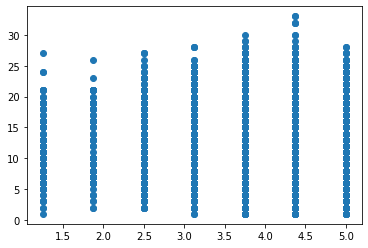

In [9]:
plt.scatter(y, X.n_words)
plt.show()

# y on X-axis, x.n_words on y-axis: no clear relationship between n-words "complexity" and ratings in plot

In [15]:
pd.crosstab(X.n_words, y)

# y on X-axis, x.n_words on y-axis: no clear relationship between n-words "complexity" and ratings in crosstab.
# Looks like there's just more higher rated recipes in general?

rating,1.250,1.875,2.500,3.125,3.750,4.375,5.000
n_words,,,,,,,
1.0,1,0,0,2,7,7,6
2.0,2,2,5,6,24,16,35
3.0,5,2,8,7,21,43,37
4.0,2,3,10,23,72,78,80
5.0,7,1,11,44,158,213,82
6.0,12,11,31,78,267,378,123
7.0,12,11,26,111,387,506,159
8.0,12,13,50,151,436,705,168
9.0,14,12,42,123,473,634,168


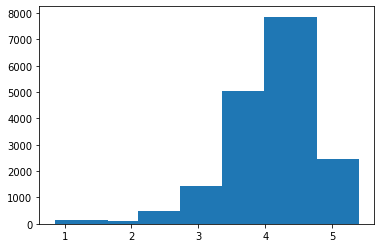

In [19]:
plt.bar(y.value_counts().index, y.value_counts())
plt.show()

# Most reviews are 4 or above

3-ingredient recipes: Check if missing vals, etc.

In [20]:
print(X["3-ingredient recipes"].value_counts())
X.loc[X["3-ingredient recipes"].isna()]

# Not many 3-ingredient recipes: only 14 of almost 20k
# No missing values to fill in

0.0    17582
1.0       14
Name: 3-ingredient recipes, dtype: int64


,title,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,n_words


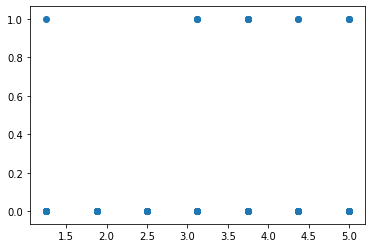

In [13]:
plt.scatter(y, X["3-ingredient recipes"])
plt.show()

# No clear relationship 

In [21]:
pd.crosstab(X["3-ingredient recipes"], y)

rating,1.250,1.875,2.500,3.125,3.750,4.375,5.000
3-ingredient recipes,,,,,,,
0.0,147,120,499,1449,5033,7862,2472
1.0,1,0,0,3,5,2,3


holidays: Dummy if a common/US holiday

In [11]:
# Get full list of X columns
X_cols = [col for col in X.columns]
X_cols

['title',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisket',
 'broc

In [40]:
holidays = ["bastille day", "christmas", "christmas eve", "cinco de mayo", "columbus", 
 "diwali", "easter", "father's day", "fourth of july", "friendsgiving", "halloween",
 "hanukkah", "kwanzaa", "labor day", "lunar new year", "mother's day", "new year's day",
 "new year's eve", "oktoberfest", "passover", "persian new year", "purim", "ramadan", 
 "rosh hashanah/yom kippur", "st. patrick's day", "sukkot", "thanksgiving", 
 "valentine's day"]

X["holiday"] = np.where(X[holidays].sum(axis=1)>0, 1, 0)

In [46]:
X.holiday.value_counts()

0    13999
1     3597
Name: holiday, dtype: int64

In [43]:
X.loc[X.holiday.isna()]

# No NAs in holiday

,title,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,n_words,holiday


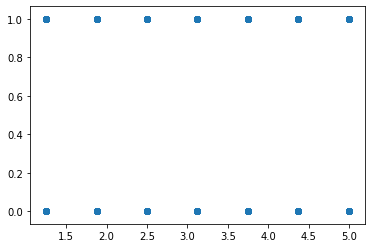

rating,1.250,1.875,2.500,3.125,3.750,4.375,5.000
holiday,,,,,,,
0,132,100,432,1212,4213,6094,1816
1,16,20,67,240,825,1770,659


In [45]:
plt.scatter(y, X.holiday)
plt.show()

pd.crosstab(X.holiday, y)

# Doesn't look like clear relationship between holiday and rating